This file is intended to do some initial EDA before Actually jumping into the model. Even though, we don't have it as a part of the assignment, I am doing this to identify outliers and get an idea about the features.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./dataset/split_train.csv')
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154256 entries, 0 to 154255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   154256 non-null  int64  
 1   age                  154256 non-null  int64  
 2   height(cm)           154256 non-null  int64  
 3   weight(kg)           154256 non-null  int64  
 4   waist(cm)            154256 non-null  float64
 5   eyesight(left)       154256 non-null  float64
 6   eyesight(right)      154256 non-null  float64
 7   hearing(left)        154256 non-null  int64  
 8   hearing(right)       154256 non-null  int64  
 9   systolic             154256 non-null  int64  
 10  relaxation           154256 non-null  int64  
 11  fasting blood sugar  154256 non-null  int64  
 12  Cholesterol          154256 non-null  int64  
 13  triglyceride         154256 non-null  int64  
 14  HDL                  154256 non-null  int64  
 15  LDL              

In [20]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in numerical columns
print("=== OUTLIER DETECTION (IQR Method) ===\n")
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"Column: {col}")
    print(f"  Lower Bound: {lower:.2f}")
    print(f"  Upper Bound: {upper:.2f}")
    print(f"  Number of Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print()

=== OUTLIER DETECTION (IQR Method) ===

Column: id
  Lower Bound: -79622.00
  Upper Bound: 238892.00
  Number of Outliers: 0 (0.00%)

Column: age
  Lower Bound: 17.50
  Upper Bound: 77.50
  Number of Outliers: 664 (0.43%)

Column: height(cm)
  Lower Bound: 145.00
  Upper Bound: 185.00
  Number of Outliers: 449 (0.29%)

Column: weight(kg)
  Lower Bound: 37.50
  Upper Bound: 97.50
  Number of Outliers: 2220 (1.44%)

Column: waist(cm)
  Lower Bound: 59.00
  Upper Bound: 107.00
  Number of Outliers: 829 (0.54%)

Column: eyesight(left)
  Lower Bound: 0.20
  Upper Bound: 1.80
  Number of Outliers: 2252 (1.46%)

Column: eyesight(right)
  Lower Bound: 0.20
  Upper Bound: 1.80
  Number of Outliers: 2396 (1.55%)

Column: hearing(left)
  Lower Bound: 1.00
  Upper Bound: 1.00
  Number of Outliers: 3691 (2.39%)

Column: hearing(right)
  Lower Bound: 1.00
  Upper Bound: 1.00
  Number of Outliers: 3625 (2.35%)

Column: systolic
  Lower Bound: 90.00
  Upper Bound: 154.00
  Number of Outliers: 1551 (1.

In [21]:
# Identify Skewness
skew_values = df.skew().sort_values(ascending=False)
print("Skewness in variables:\n", skew_values)

Skewness in variables:
 ALT                    35.408123
AST                    11.803539
eyesight(left)          8.917172
eyesight(right)         8.472022
LDL                     7.041660
hearing(right)          6.291122
hearing(left)           6.230388
Urine protein           5.585667
Gtp                     5.461014
fasting blood sugar     3.422152
serum creatinine        1.551904
dental caries           1.517301
triglyceride            0.986858
HDL                     0.758312
weight(kg)              0.378977
age                     0.290727
smoking                 0.254608
systolic                0.219958
relaxation              0.174783
waist(cm)               0.072463
Cholesterol             0.043022
id                     -0.000502
height(cm)             -0.269328
hemoglobin             -0.627860
dtype: float64


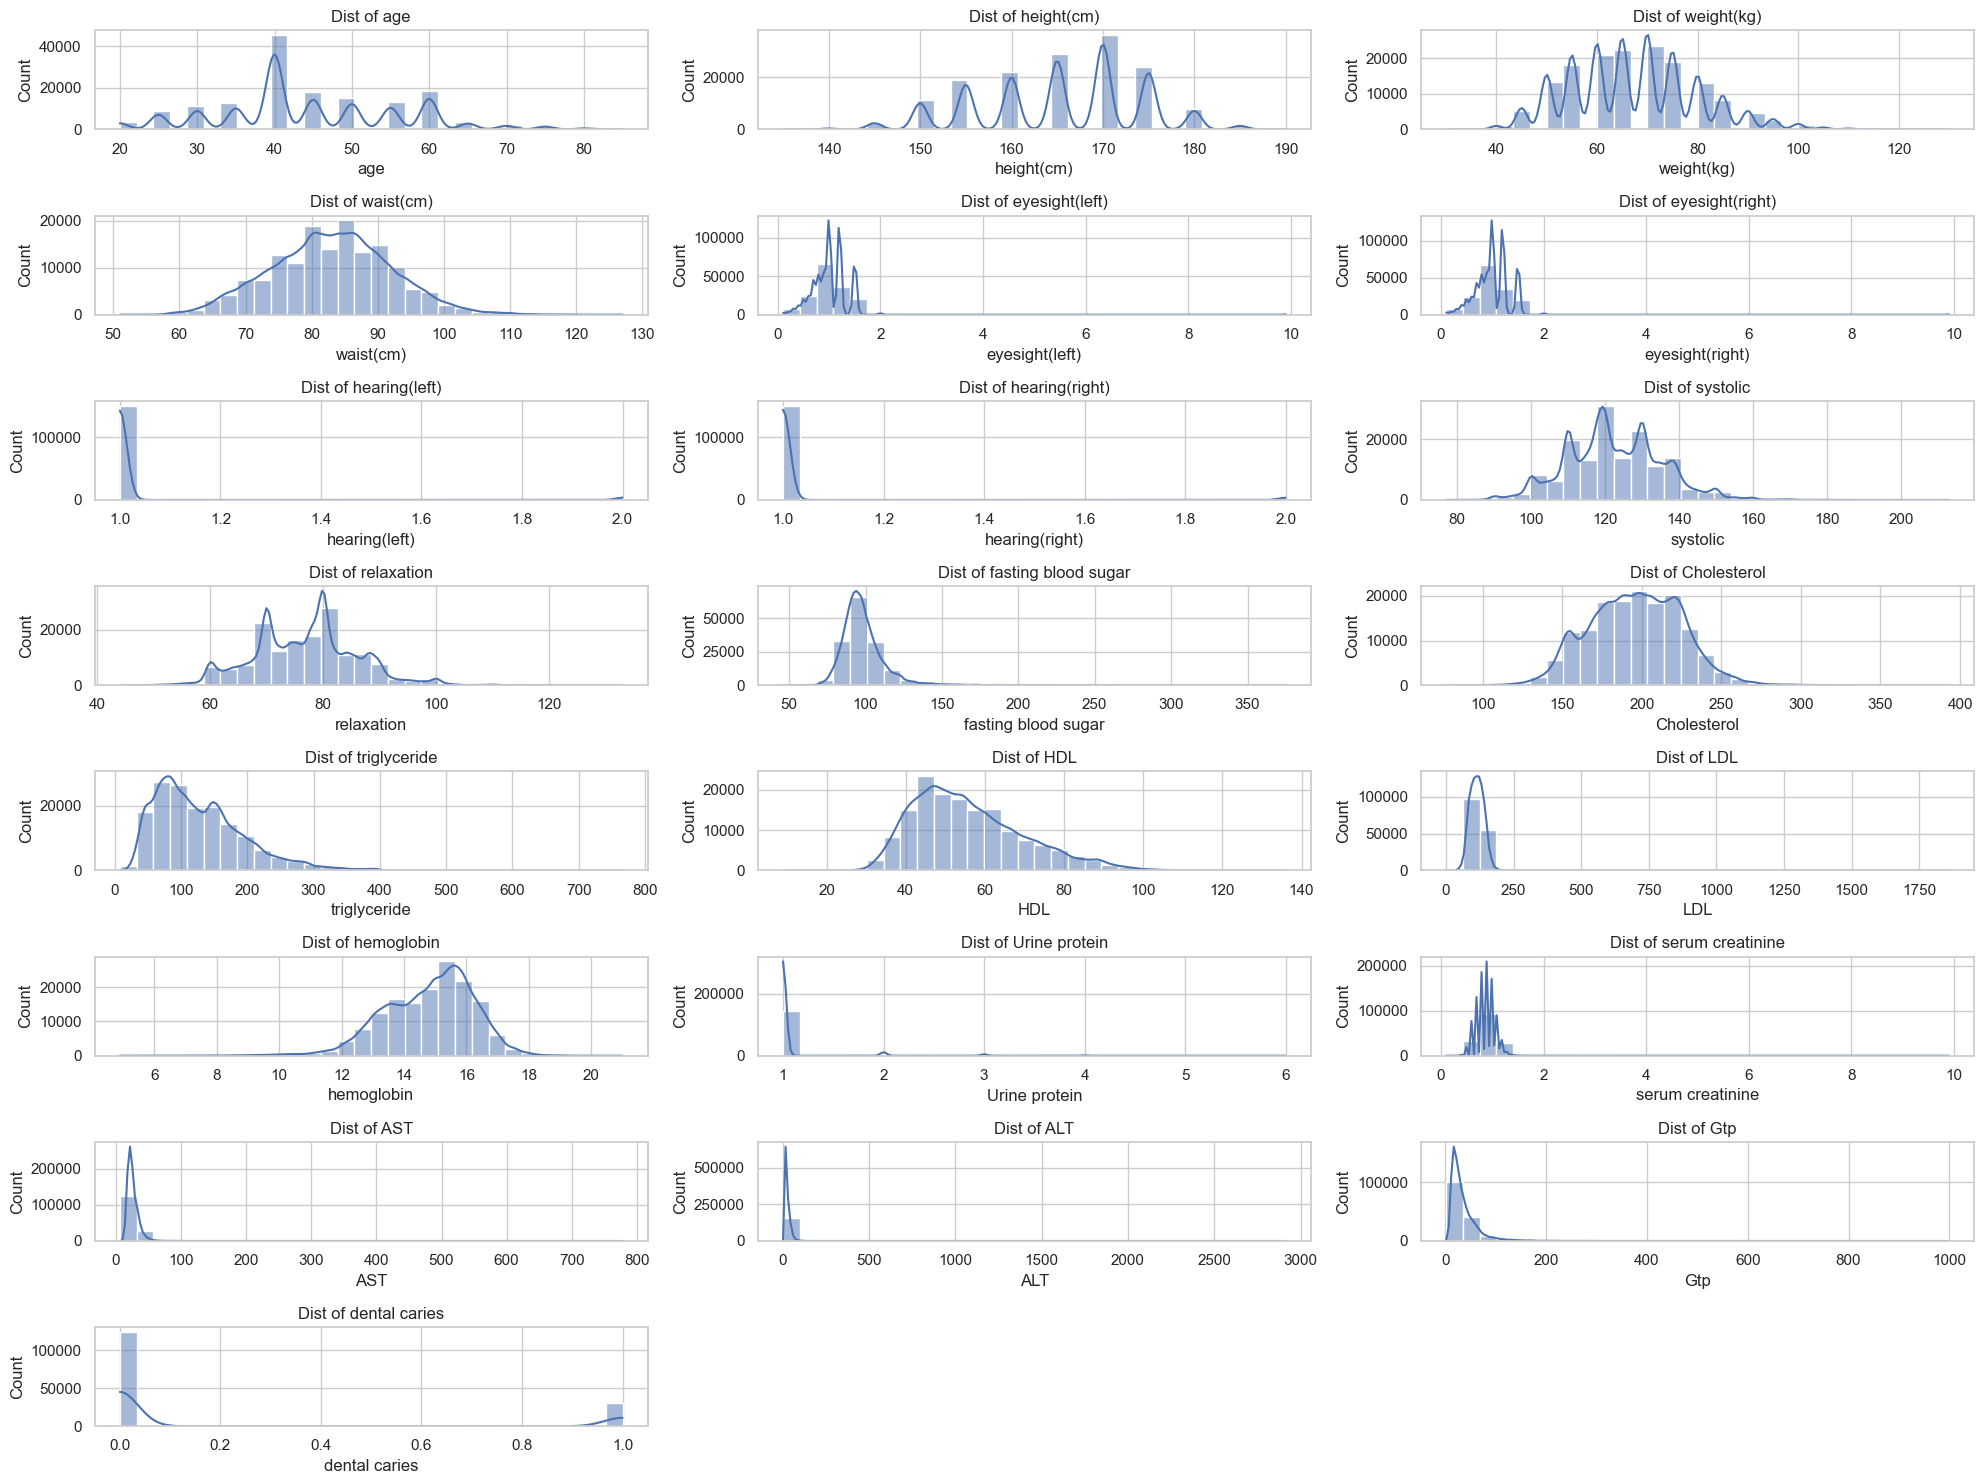

In [22]:
sns.set_theme(style="whitegrid")
cols_to_plot = df.drop(columns=['id', 'smoking']).columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols_to_plot):
    plt.subplot(8, 3, i + 1) # Adjust 6, 4 based on your number of columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Dist of {col}')
    plt.tight_layout()

plt.show()

We need to create Correlation Matrix to find which col to eliminate to avoid multi colleniarity

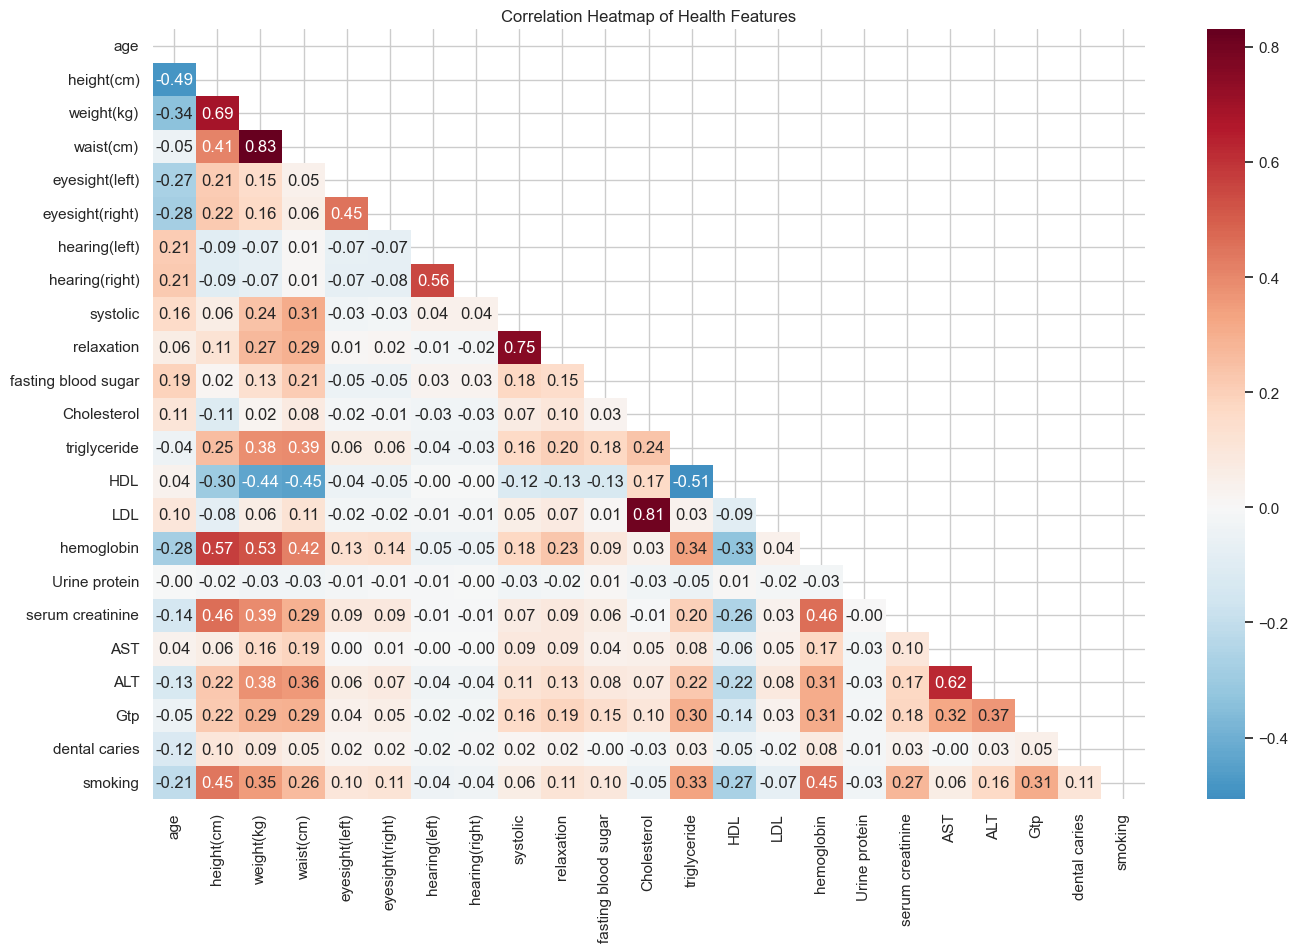

In [23]:
corr_matrix = df.drop(columns=['id']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title("Correlation Heatmap of Health Features")
plt.show()

### Findings and Action to be done
1. Weight has a high correlation with waist. it's better to drop weight.
2. Cholestrol has a high correlation with LDL. LDL is Bad Cholestrol so we keep that and we drop Cholestrol.
3. Few columns are Highly skewed. This includes AST, ALT, GTP, LDL and Fasting Sugar. We need to apply Log Trasformation here
4. Apply Standard Scaling for Categorical Values